In [ ]:
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.pipeline import make_pipeline
import os

import skimage
import skimage.color
import skimage.transform
import skimage.feature
import skimage.io

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin


class rgb2gray_transform(BaseEstimator, TransformerMixin):
    import skimage.color
    
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return np.array([skimage.color.rgb2gray(x) for x in X])
    
class hogtransformer(BaseEstimator, TransformerMixin):
    import skimage.feature
    def __init__(self,orientations = 9, pixels_per_cell=(8,8), cells_per_block=(3,3),):
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        def local_hog(img):
            hog_features = skimage.feature.hog(img,orientations = self.orientations,
                                pixels_per_cell = self.pixels_per_cell,
                               cells_per_block=self.cells_per_block)
            return hog_features
        return np.array([local_hog(x) for x in X])    
    

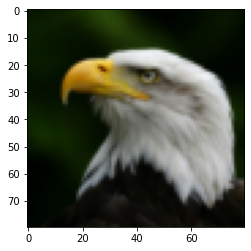

In [ ]:
# Pipeline Model
import matplotlib.pyplot as plt
%matplotlib inline


image = skimage.io.imread('dataprepare_machinelearning_pipeline/Images/eagle.jpg')
image_resize = skimage.transform.resize(image,(80,80))
image_scale = 255*image_resize
image_transform = image_scale.astype(np.uint8)

# rgb to gray
gray = skimage.color.rgb2gray(image_transform)
# hog feature
feature_vector = skimage.feature.hog(gray,
                                     orientations=10,
                                     pixels_per_cell=(8,8),cells_per_block=(2,2))

plt.imshow(image_transform)

In [ ]:
import pickle

model  = pickle.load(open('dsa_image_classification_sgd.pickle','rb'))
scaler = pickle.load(open('dsa_scalar.pickle','rb'))

In [ ]:
model.get_params()

{'alpha': 0.01,
 'average': False,
 'class_weight': None,
 'early_stopping': True,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
scalex = scaler.transform(feature_vector.reshape(1,-1))
result = model.predict(scalex)

In [ ]:
result

array(['eagle'], dtype='<U8')

In [ ]:
decision_value = model.decision_function(scalex)
labels = model.classes_

    

In [ ]:
decision_value = decision_value.flatten()

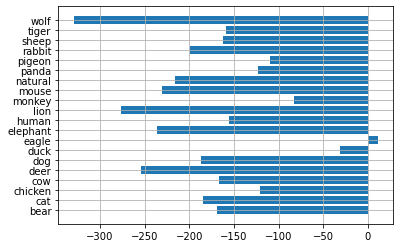

In [ ]:
plt.barh(labels,decision_value)
plt.grid()


In [ ]:
# cal Prob
z = scipy.stats.zscore(decision_value)
prob_value = scipy.special.softmax(z)
prob_value

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

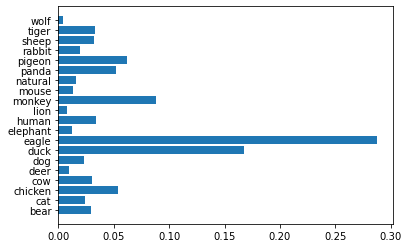

In [ ]:
plt.barh(labels,prob_value)
plt.grid

In [ ]:
# Top 5 prob values
top_5_prob_ind = prob_value.argsort()[::-1][:5]

In [ ]:
top_labels = labels[top_5_prob_ind]
top_prob = prob_value[top_5_prob_ind]

In [ ]:
top_prob,top_labels

In [ ]:
top_dict  = dict()
for key,val in zip(top_labels,top_prob):
    top_dict.update({key:np.round(val,2)})

In [ ]:
top_dict

{'eagle': 0.29, 'duck': 0.17, 'monkey': 0.09, 'pigeon': 0.06, 'chicken': 0.05}

In [ ]:
def pipeline_model(path,scaler_transform,model_sgd):
    image = skimage.io.imread(path)
    image_resize = skimage.transform.resize(image,(80,80))
    image_scale = 255*image_resize
    image_transform = image_scale.astype(np.uint8)

    # rgb to gray
    gray = skimage.color.rgb2gray(image_transform)
    # hog feature
    feature_vector = skimage.feature.hog(gray,
                                     orientations=10,
                                     pixels_per_cell=(8,8),cells_per_block=(2,2))
    
    
    # Scaling
    scalex = scaler_transform.transform(feature_vector.reshape(1,-1))
    result = model_sgd.predict(scalex)
    
    #decision function
    decision_value = model.decision_function(scalex).flatten()
    labels = model_sgd.classes_
    
    #Probability
    z = scipy.stats.zscore(decision_value)
    prob_value = scipy.special.softmax(z)
    prob_value
    
    # Top 5 prob values
    top_5_prob_ind = prob_value.argsort()[::-1][:5]
    top_labels = labels[top_5_prob_ind]
    top_prob = prob_value[top_5_prob_ind]
    
    #put in Dictionary
    top_dict  = dict()
    for key,val in zip(top_labels,top_prob):      
        top_dict.update({key:np.round(val,3)})
    
    
    
    
    
    return top_dict

In [ ]:
res = pipeline_model('dataprepare_machinelearning_pipeline/Images/eagle.jpg',scaler,model)
res

{'eagle': 0.288,
 'duck': 0.168,
 'monkey': 0.088,
 'pigeon': 0.062,
 'chicken': 0.054}